In [21]:
# Importacion de librerias

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [4]:
# Cargo el conjunto de datos en memoria
dataset = load_wine()
data = dataset.data
y = dataset.target

print(data)
print()
print(y)

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [20]:
# Podemos ver como 'y', nuestra variable dependiente, contiene un total de 3 valores diferentes, pertenecientes al rango [0,1,2]. Esta variable es entonces una variable categorica (como
# ya se ha dicho antes, este dataset esta orientado a construir modelos de clasificacion), y cada valor corresponde a la etiqueta para el ejemplo en cuestion.
# En el caso del algoritmo KNN, no se tratara de obtener un modelo que represente la relacion que existe entre las diferentes variables. El KNN es un modelo basado en instancias, por lo que
# unicamente 'almacena' el conjunto de entrenamiento en un espacio tridimensional, que utilizara para representar un nuevo ejemplo y tratar de clasificarlo en una de las diferentes clases
# posibles.

In [10]:
# Defino una lista que contenga los nombres de las columnas originales del dataset

nombres_columnas = [
    "alcohol",
    "malic_acid",
    "ash",
    "alcalinity_of_ash",
    "magnesium",
    "total_phenols",
    "flavanoids",
    "nonflavanoid_phenols",
    "proanthocyanins",
    "color_intensity",
    "hue",
    "od280/od315_of_diluted_wines",
    "proline"]

# Para facilitar la representacion del conjunto de datos, defino un dataframe que cargue el conjunto de datos completo, incluida la etiqueta
dataset_df = pd.DataFrame(data = data,
                          columns = nombres_columnas)

In [13]:
dataset_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [14]:
# Incluyo la columna de mi variable dependiente al dataframe
y = pd.Series(data = y)
dataset_df["wine_class"] = y

In [16]:
dataset_df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [18]:
# Ahora dispongo de un dataframe completo que contiene todos los datos relativos a este 'toy dataset'.

# Analisis de los datos


In [17]:
# Si echamos un breve vistazo a los 5 primeros ejemplos representados en nuestro dataframe, podremos darnos cuenta de un par de cosas:
#  - Los valores de las diferentes columnas estan expresados en unidades diferentes, lo que puede causar ruido al momento de realizar futuras inferencias. Es nuestro trabajo procesar estos 
#    datos, y normalizar nuestro conjunto de datos, de forma que podamos disminuir la penalizacion que puedan llegar a causar posibles outliers (este es un paso importante, a tener en cuenta
#    en la mayoria de ocasiones en las que se trabaja con datos, pero es cierto que los 'toy datasets' de scikit ya se encuentran procesados en gran medida, por lo que es probable que no
#    cuente con valores inusuales. Por otro lado, voy a entrenar un modelo de KNN, es cual, debido a la logica propia del algoritmo, basada en distancias, hace que sea mas robusto frente a
#    estos posibles outliers.
#  - Los primeros 5 ejemplos (al igual que otros tantos), pertenecen a la clase 0, puesto que todos los ejemplos se han cargado en memoria 'ordenados'. Es importante tener esto en cuenta, y randomizar
#    los ejemplos al crear los conjuntos  de entrenamiento y prueba.

In [19]:
# Genero un resumen del conjunto de datos con df.describe()

dataset_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [ ]:
# Como se puede ver en el conteo de todas las variables, existen 178 ejemplos para todas, por lo que sabemos que no contamos con valores nulos.
# Por otra parte, en relacion a los datos, se puede decir que:
# - El cuadro nos muestra la media y desviacion estandar para cada una de las columnas que componen el dataset. Esto es util saberlo para tener una idea mas general de nuestros datos. Sin embargo, en
#   este caso, no llegaremos a hacer uso de estos valores (de manera 'directa', pues SkLearn hace uso de estas metricas al aplicar normalizacion con la clase StandardScaler()).
# - El cuadro muestra el valor minimo y maximo de cada uno de los registros para las columnas que componen el dataframe del conjunto de datos.

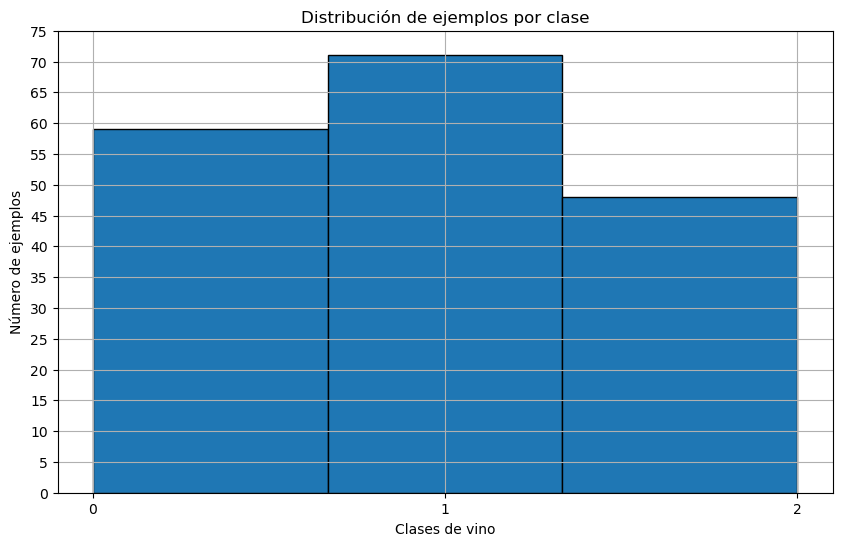

In [34]:
# Por otra parte, existen 3 clases diferentes de vinos para clasificar.
# Represento en un histograma el numero de ejemplos que tenemos para cada clase

plt.figure(figsize = (10, 6))
plt.hist(dataset_df["wine_class"], bins=3, edgecolor='black')

plt.title("Distribución de ejemplos por clase")
plt.xlabel("Clases de vino")
plt.ylabel("Número de ejemplos")


plt.yticks(range(0, 80, 5))
plt.xticks(range(3))  # Esto colocará ticks en 0, 1, y 2

plt.grid()
plt.show()

In [35]:
# Obtengo el numero de ejemplos para cada clase
distrib_clases = dataset_df['wine_class'].value_counts()
distrib_clases

wine_class
1    71
0    59
2    48
Name: count, dtype: int64

In [36]:
# De la clase para la que mas ejemplos contamos es la clase 1, asi como nuestra clase 2 es aquella para la que menos ejemplos registra nuestro conjunto de datos.

In [37]:
# Represento una matriz con los coeficientes de correlacion de Pearson para cada una de las variables de mi conjunto de datos.
matrix_corr = dataset_df.corr()
matrix_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


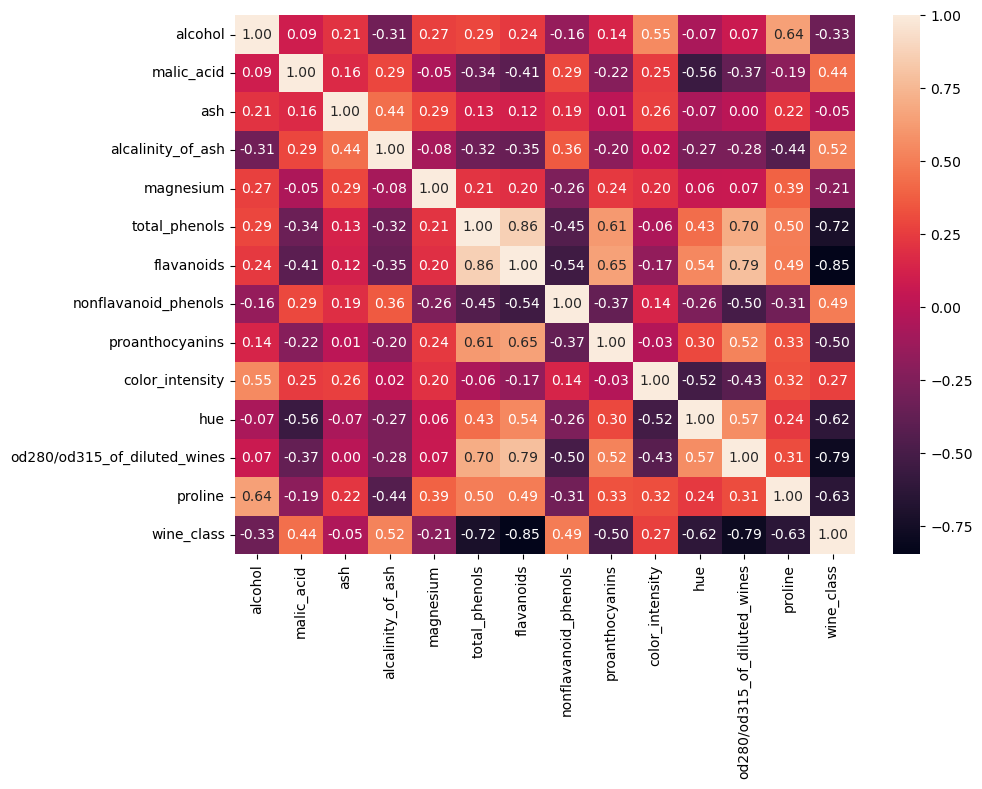

In [43]:
# Represento la matriz en un mapa de calor
plt.figure(figsize = (10,7))
sns.heatmap(matrix_corr, annot=True, fmt=".2f")

plt.show()

In [81]:
# Este mapa de calor nos representa de una forma muy grafica los coeficientes de correlacion que existen entre cada variable y el resto.
# Esto es util al momento de saber que variables utilizar como covariables predictoras de nuestro modelo, puesto que no es recomendable incluir variables que solamente aumenten la complejidad
# de nuestro modelo, sin aportar nada de valor real.
# En este caso, al ser KNN un algoritmo basado en instancias, hare uso de todas las variables para clasificar el conjunto de prueba. Tras esto, reducire el numero de covariables predictoras, y volvere
# a clasificar un nuevo conjunto de pruebas.

# Division del conjunto de datos


In [63]:
# Defino mi matriz de caracteristicas, y mi matriz de 1 columna con las clases de cada ejemplo

X = dataset_df.drop(columns = ['wine_class'])
y = dataset_df['wine_class']

In [64]:
# Genero los conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # <== Randomizo el orden de los ejemplos en los subconjuntos creados

In [65]:
X_train.shape

(142, 13)

In [66]:
X_test.shape

(36, 13)

In [67]:
y_train.shape

(142,)

In [68]:
y_test.shape

(36,)

In [69]:
# Es importante normalizar los valores de mis matrices de caracteristicas, y mas aun en modelos basados en distancias (KNN clasifica los datos por semejanza basandose en la distancia Euclidiana)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# IMPORTANTE. Para normalizar los datos, a cada uno de los valores de cada variable en cada ejemplo, se le suma la media de todos los valores de la columna, y se divide el resultado por la desviacion estandar
# obtenida. Como se dijo antes, no utilizamos de manera directa estos valores, pero scikit hace uso de ellos en la clase StandardScaler


In [70]:
X_train

array([[ 1.66529275, -0.60840587,  1.21896194, ..., -1.65632857,
        -0.87940904, -0.24860607],
       [-0.54952506,  2.7515415 ,  1.00331502, ..., -0.58463272,
        -1.25462095, -0.72992237],
       [-0.74531007, -1.14354109, -0.93750727, ...,  0.35845962,
         0.2462267 , -0.24860607],
       ...,
       [ 1.714239  , -0.44172441,  0.06884503, ...,  1.04434496,
         0.56585166,  2.69572196],
       [-0.35374006, -0.7399965 , -0.36244882, ...,  0.01551695,
        -0.74044166, -0.79631083],
       [-0.78201975,  0.06709269,  0.35637426, ..., -0.67036839,
         1.09392769, -0.98551793]])

# Defino y entreno el modelo de clasificacion

In [71]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [72]:
# Obtengo un rendimiento general del modelo con model.score()

model.score(X_test, y_test)

0.9444444444444444

In [73]:
# Obtengo cerca de un 0.95% de Accuracy al clasificar el modelo tras aplicar Feature Scaling, incluyendo todas las variables de mi dataset como covariables predictoras.

# Genero ahora las predicciones del modelo
y_pred = model.predict(X_test)

In [78]:
# Evaluo las predicciones del modelo en una matriz de confusion

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[14  0  0]
 [ 1 12  1]
 [ 0  0  8]]


In [77]:
# El modelo solo ha fallado al clasificar dos instancias pertenecientes a la clase '1'.
# Esto puede reflejar una deficiencia del modelo al tratar de clasificar correctamente ejemplos que pertenecen a esta clase.

# Represento los resultados en un cuadro de clasificacion

from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
# En este conjunto de pruebas, el modelo disponia de 14 ejemplos pertenecientes a la clase 0, y 14 para la clase 1. Tenia menos ejemplos pertenecientes a la clase 2 (en concreto, 8 ejemplos).

# Voy a entrenar el modelo limitando el numero de covariables predictoras

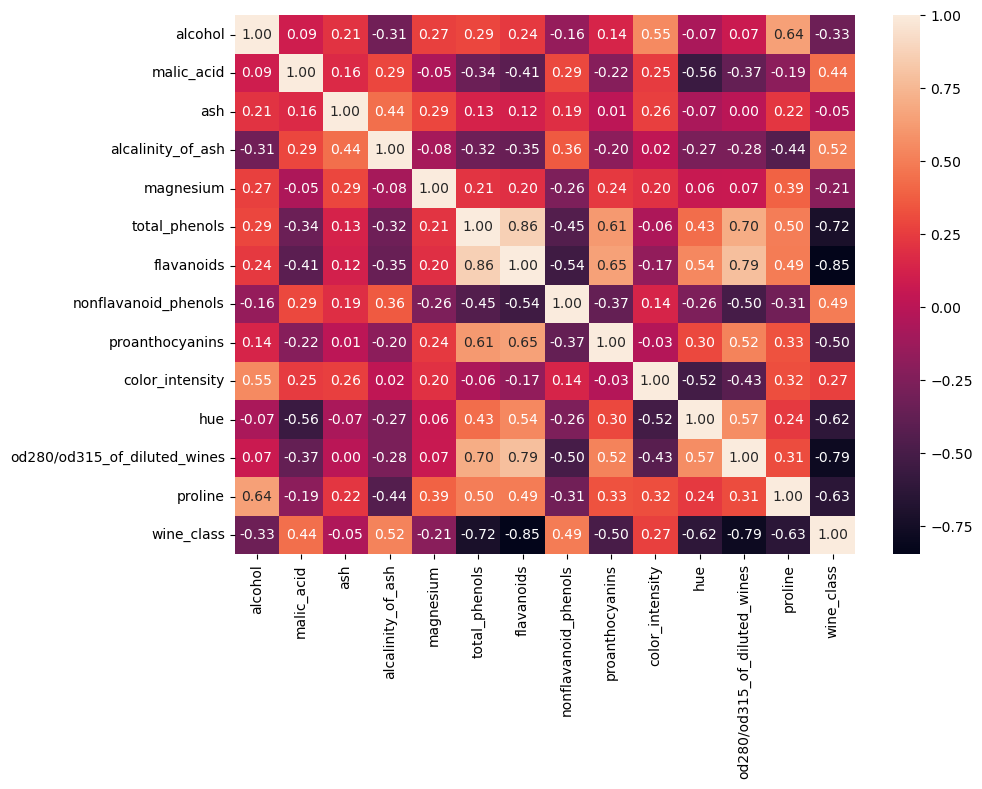

In [79]:
# Represento nuevamente el mapa de calor de los coeficientes de correlacion de mi conjunto de datos
plt.figure(figsize = (10,7))
sns.heatmap(matrix_corr, annot=True, fmt=".2f")

plt.show()

In [86]:
# Los coeficientes de correlacion de nuestra variable dependiente, en relacion con el resto de columnas, se puede ver en la ultima columna del mapa (o ultima fila, puesto que es simetrico).
# Voy a utilizar solamente variables cuya relacion sea positiva con mi variable dependiente.

X = dataset_df.drop(columns = ['total_phenols', 'flavanoids', 'proanthocyanins', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'wine_class'])
y = dataset_df['wine_class']

In [87]:
# Divido el conjunto de datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Aplico Feature Scaling

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test) 

In [89]:
# Defino y entreno un nuevo modelo

model_2 = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

In [90]:
# Obtengo un rendimiento general del modelo con model.score()

model.score(X_test, y_test)

1.0

In [91]:
# En este caso, la precision es perfecta para el conjunto de pruebas generado.

# Genero ahora las predicciones del modelo
y_pred = model.predict(X_test)

In [92]:
# Evaluo las predicciones del modelo en una matriz de confusion

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


In [93]:
# Como se veia, el modelo ha clasificado ahora correctamente todas las muestras del conjunto de pruebas.

class_report = classification_report(y_test, y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

